# Bank Marketing Dataset (UCI)

Dataset can be downloaded [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

<br><b> bank client data: </b>
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                   "blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")

<br><b> related with the last contact of the current campaign: </b>
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)

<br><b> other attributes: </b>
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

<br><b>Output variable (desired target): </b>
17. y - has the client subscribed a term deposit? (binary: "yes","no")

<br>

#### This is a Classification problem to predict whether a client will subscribe to bank's deposit or not

<br>
<br>
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
df = pd.read_csv("bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## EDA

In [4]:
numerical_cols = df.drop(["y"], axis=1).select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.drop(["y"], axis=1).select_dtypes(include=object).columns.tolist()

### EDA: Target y

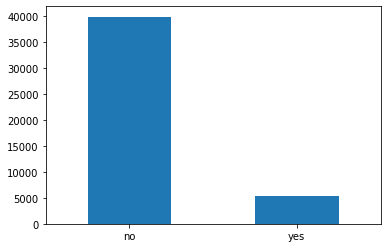

In [8]:
df["y"].value_counts().plot.bar(rot=0)

### EDA: All Numerical Cols

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


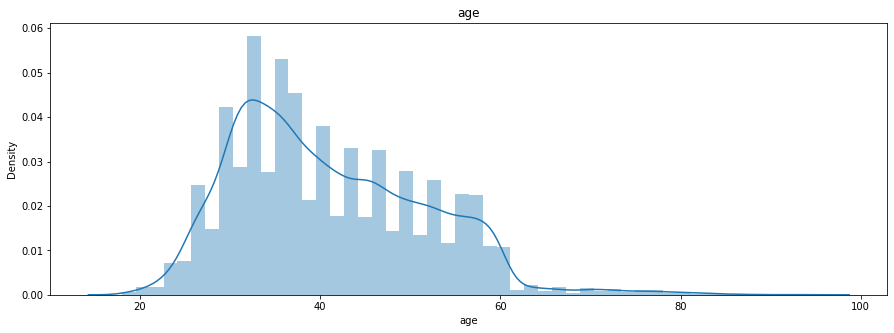

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


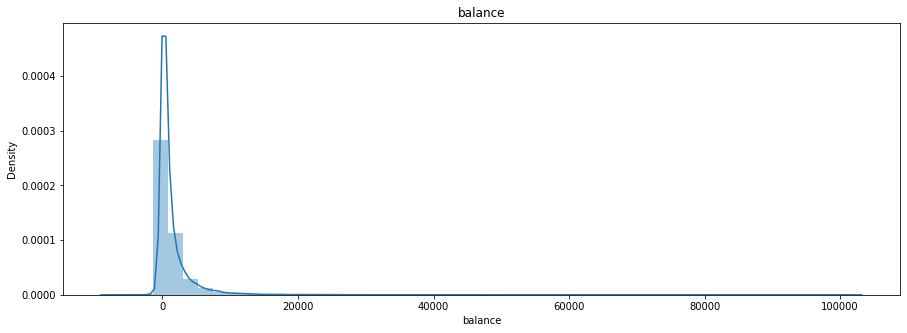

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


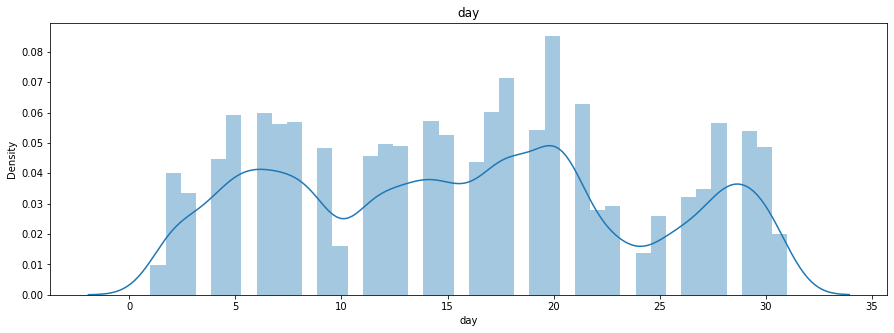

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


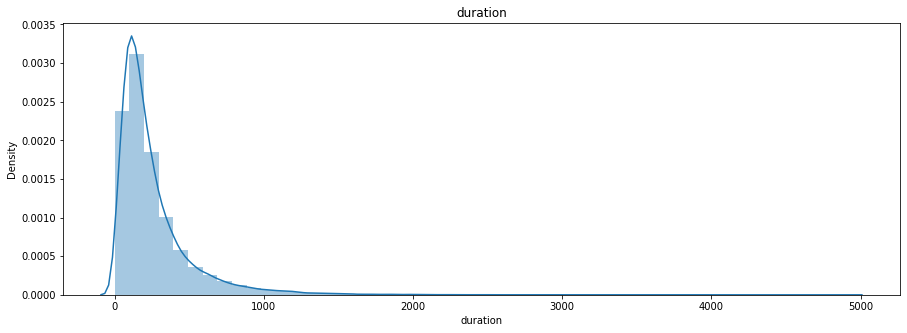

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


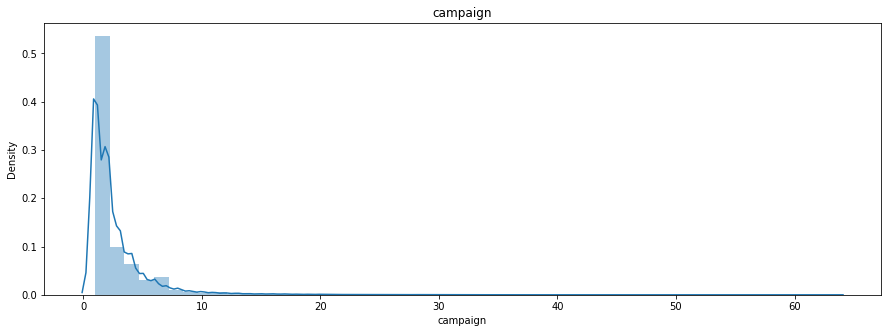

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


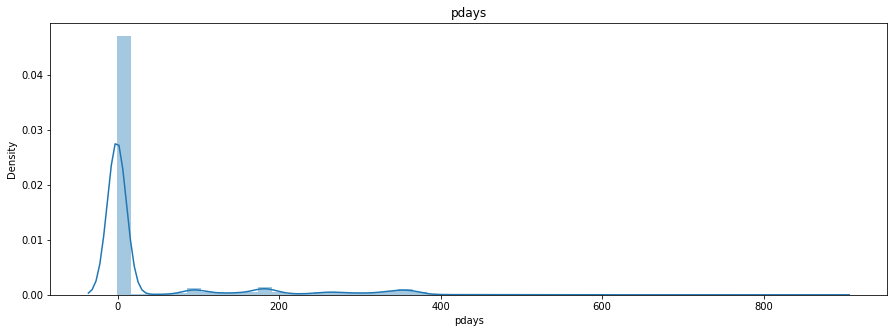

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


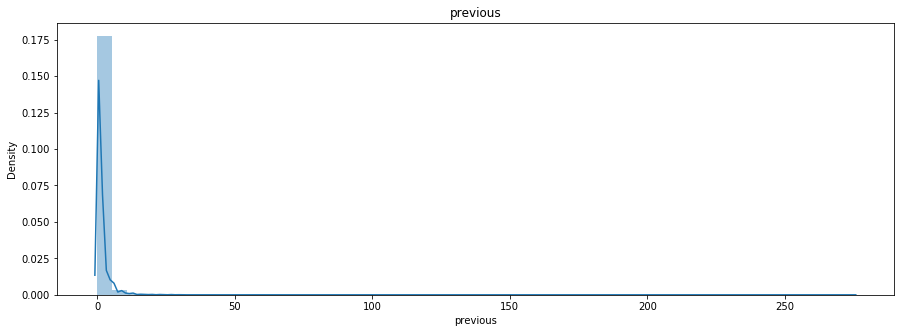

In [6]:
for col in numerical_cols:
    plt.figure(figsize=(15,5))
    sns.distplot(df[col])
    plt.title(col)
    plt.show()

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


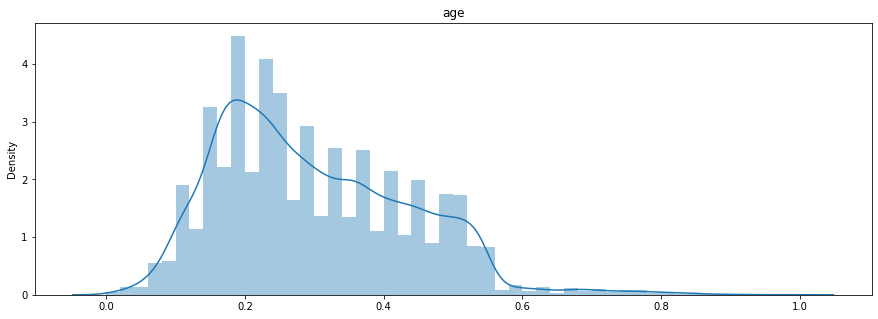

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


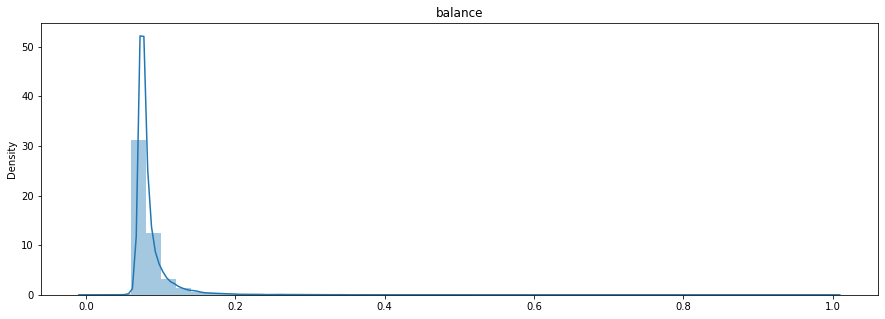

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


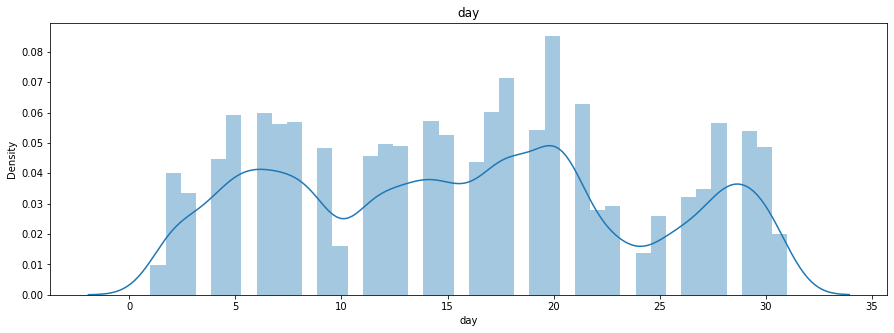

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


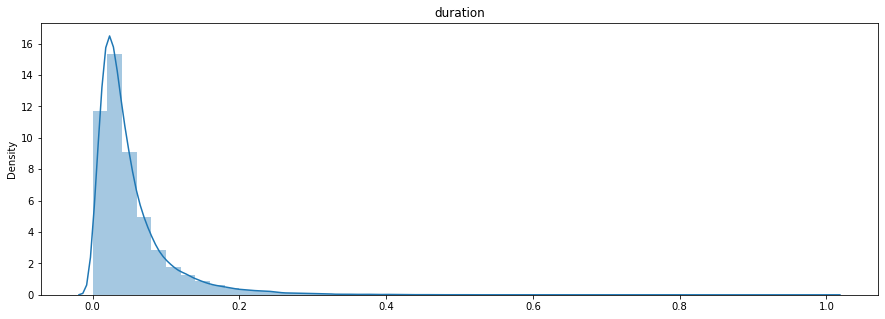

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


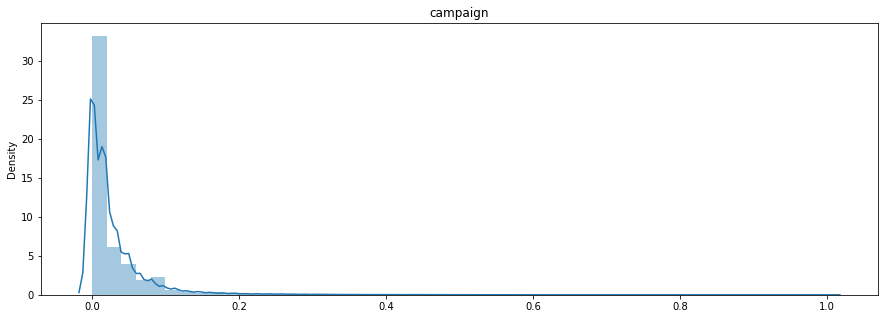

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


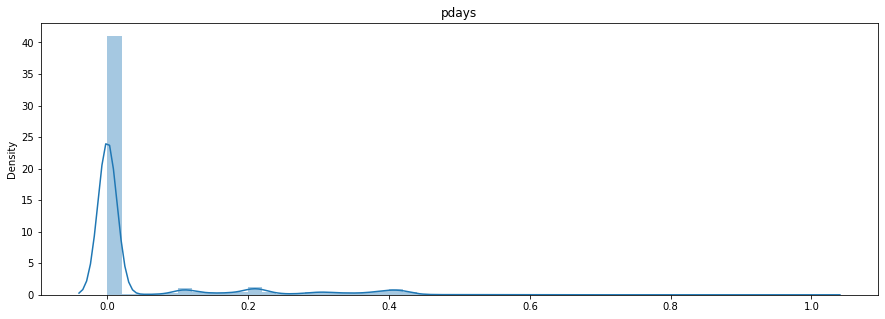

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


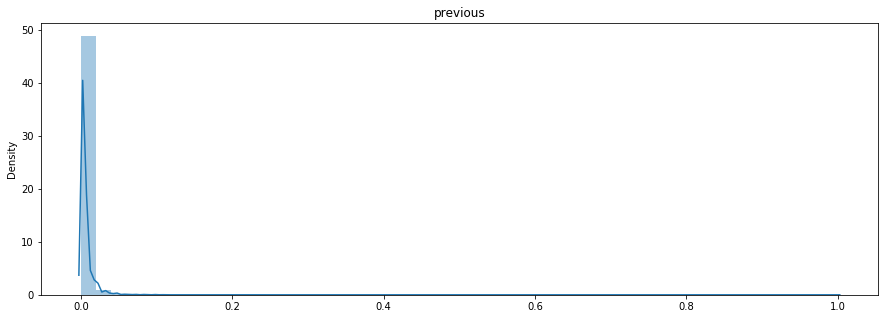

In [7]:
sc = MinMaxScaler()

for col in numerical_cols:
    
    if col != "day":
        temp = sc.fit_transform(np.expand_dims(df[col], axis=1))
    else:
        temp = df[col]
    
    plt.figure(figsize=(15,5))
    sns.distplot(temp)
    plt.title(col)
    plt.show()

### EDA: All Categorical Cols

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


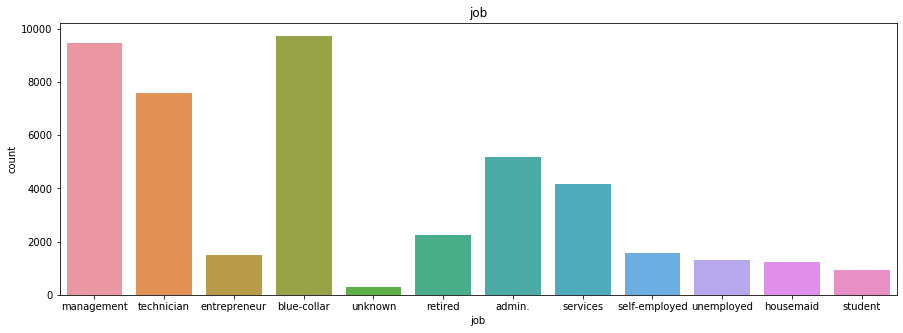

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


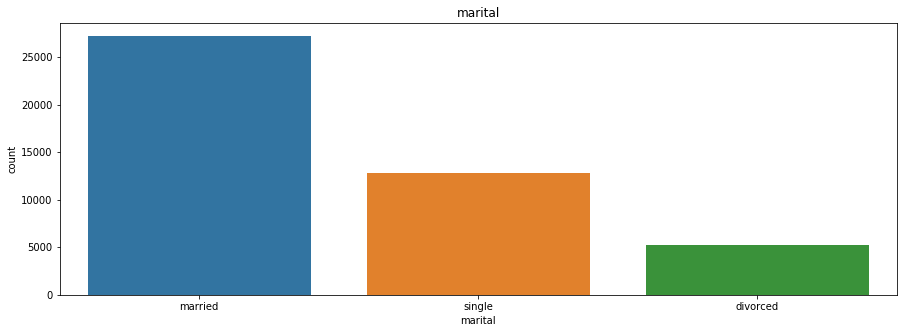

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


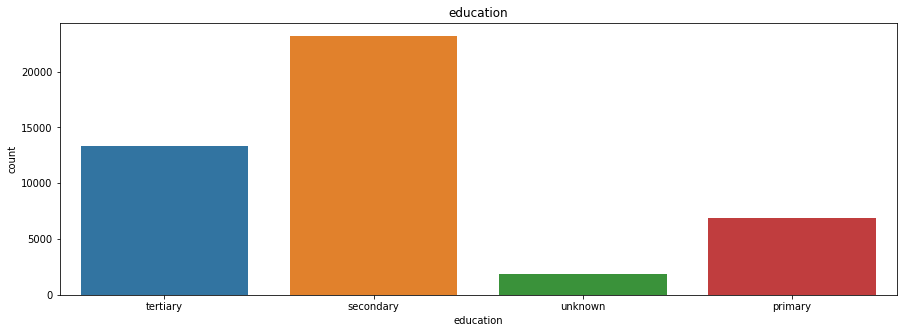

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


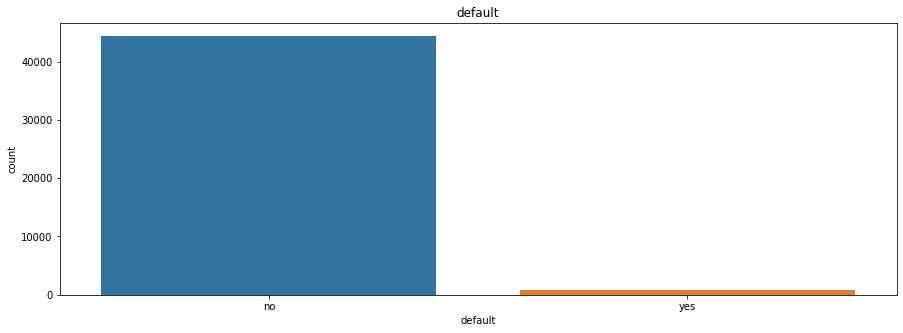

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


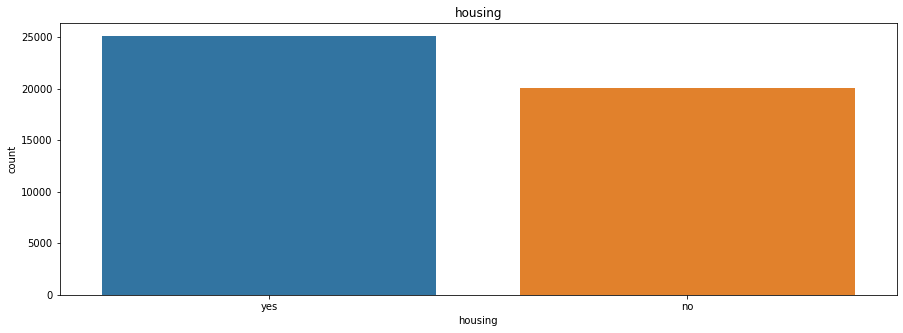

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


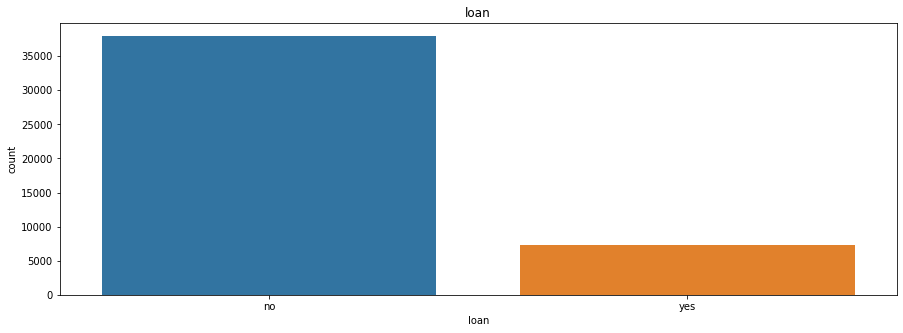

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


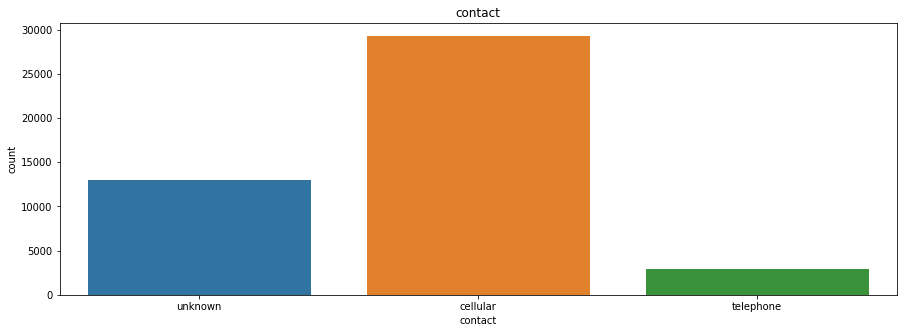

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


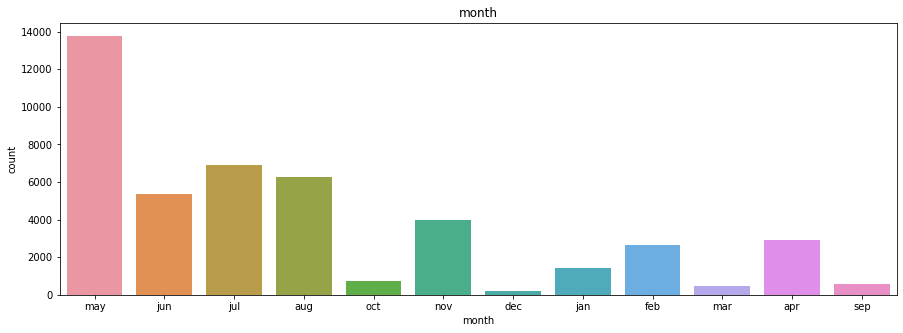

C:\Users\DV\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


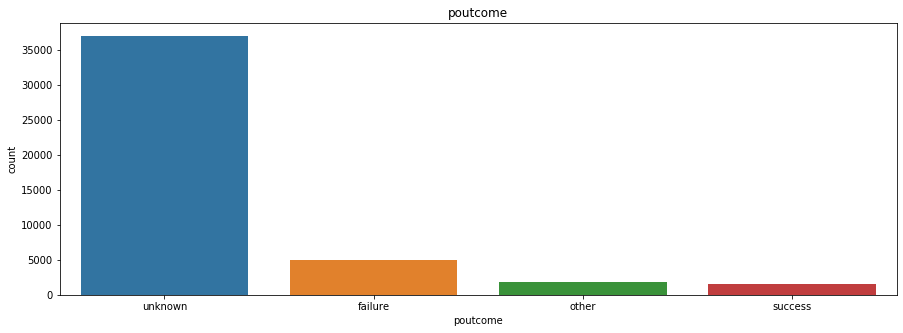

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

## Feature Engineering

In [9]:
sc = MinMaxScaler()
for col in numerical_cols:
    if col != "day":
        df[col] = sc.fit_transform(np.expand_dims(df[col], axis=1))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,5,may,0.053070,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,5,may,0.030704,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,5,may,0.015453,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,5,may,0.018707,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,5,may,0.040260,0.0,0.0,0.0,unknown,no


In [10]:
for col in categorical_cols:
    if col != "month":
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1)
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,5,may,0.053070,0.0,0.0,0.0,no,0,...,1,1,0,0,0,1,0,0,0,1
1,0.337662,0.073067,5,may,0.030704,0.0,0.0,0.0,no,0,...,1,1,0,0,0,1,0,0,0,1
2,0.194805,0.072822,5,may,0.015453,0.0,0.0,0.0,no,0,...,1,0,1,0,0,1,0,0,0,1
3,0.376623,0.086476,5,may,0.018707,0.0,0.0,0.0,no,0,...,1,1,0,0,0,1,0,0,0,1
4,0.194805,0.072812,5,may,0.040260,0.0,0.0,0.0,no,0,...,0,1,0,0,0,1,0,0,0,1


In [11]:
temp = []
for mo in df["month"]:
    switcher = {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12,
    }
    temp.append(switcher.get(mo, "nothing"))
df["month"] = temp
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,5,5,0.053070,0.0,0.0,0.0,no,0,...,1,1,0,0,0,1,0,0,0,1
1,0.337662,0.073067,5,5,0.030704,0.0,0.0,0.0,no,0,...,1,1,0,0,0,1,0,0,0,1
2,0.194805,0.072822,5,5,0.015453,0.0,0.0,0.0,no,0,...,1,0,1,0,0,1,0,0,0,1
3,0.376623,0.086476,5,5,0.018707,0.0,0.0,0.0,no,0,...,1,1,0,0,0,1,0,0,0,1
4,0.194805,0.072812,5,5,0.040260,0.0,0.0,0.0,no,0,...,0,1,0,0,0,1,0,0,0,1


In [12]:
le = LabelEncoder()

df["y"] = le.fit_transform(df["y"])
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,5,5,0.053070,0.0,0.0,0.0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,0.337662,0.073067,5,5,0.030704,0.0,0.0,0.0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,0.194805,0.072822,5,5,0.015453,0.0,0.0,0.0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,0.376623,0.086476,5,5,0.018707,0.0,0.0,0.0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,0.194805,0.072812,5,5,0.040260,0.0,0.0,0.0,0,0,...,0,1,0,0,0,1,0,0,0,1


## Training

In [13]:
X = df.drop(["y"], axis=1)
y = df["y"]

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.25)

rus = RandomOverSampler()
X_rus, y_rus = rus.fit_resample(X, y)
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.25)

In [14]:
models = ["LogisticRegression", "SVC", "DecisionTreeClassifier", "RandomForestClassifier", "XGBClassifier", "LGBMClassifier"]
score = ["accuracy_score", "precision_score", "recall_score"]

In [15]:
logreg = LogisticRegression()

print("Oversample")
logreg.fit(X_ros_train, y_ros_train)
y_pred = logreg.predict(X_ros_test)
print(accuracy_score(y_pred, y_ros_test))
print(precision_score(y_pred, y_ros_test))
print(recall_score(y_pred, y_ros_test))

print("Undersample")
logreg.fit(X_rus_train, y_rus_train)
y_pred = logreg.predict(X_rus_test)
print(accuracy_score(y_pred, y_rus_test))
print(precision_score(y_pred, y_rus_test))
print(recall_score(y_pred, y_rus_test))

Oversample


C:\Users\DV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8103802414708682
0.7910462676126712
0.8237252861602498
Undersample
0.8135864936626421
0.7903855783675513
0.8289915966386555


C:\Users\DV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
svc = SVC()

print("Oversample")
svc.fit(X_ros_train, y_ros_train)
y_pred = svc.predict(X_ros_test)
print(accuracy_score(y_pred, y_ros_test))
print(precision_score(y_pred, y_ros_test))
print(recall_score(y_pred, y_ros_test))

print("Undersample")
svc.fit(X_rus_train, y_rus_train)
y_pred = svc.predict(X_rus_test)
print(accuracy_score(y_pred, y_rus_test))
print(precision_score(y_pred, y_rus_test))
print(recall_score(y_pred, y_rus_test))

Oversample
0.7687991583587996
0.729889077645648
0.7925347222222222
Undersample
0.7681478883823456
0.7262894341512268
0.792828249699355


In [17]:
dt = DecisionTreeClassifier()

print("Oversample")
dt.fit(X_ros_train, y_ros_train)
y_pred = dt.predict(X_ros_test)
print(accuracy_score(y_pred, y_ros_test))
print(precision_score(y_pred, y_ros_test))
print(recall_score(y_pred, y_ros_test))

print("Undersample")
dt.fit(X_rus_train, y_rus_train)
y_pred = dt.predict(X_rus_test)
print(accuracy_score(y_pred, y_rus_test))
print(precision_score(y_pred, y_rus_test))
print(recall_score(y_pred, y_rus_test))

Oversample
0.9594208706978609
0.9988008394124113
0.926063189104049
Undersample
0.9611241921747408
0.9984977466199298
0.9290839623520641


In [18]:
rf = RandomForestClassifier()

print("Oversample")
rf.fit(X_ros_train, y_ros_train)
y_pred = rf.predict(X_ros_test)
print(accuracy_score(y_pred, y_ros_test))
print(precision_score(y_pred, y_ros_test))
print(recall_score(y_pred, y_ros_test))

print("Undersample")
rf.fit(X_rus_train, y_rus_train)
y_pred = rf.predict(X_rus_test)
print(accuracy_score(y_pred, y_rus_test))
print(precision_score(y_pred, y_rus_test))
print(recall_score(y_pred, y_rus_test))

Oversample
0.9680877711537498
0.9994004197062056
0.9406508653122648
Undersample
0.969290115725665
0.9984977466199298
0.9434140802422407


In [19]:
xgb = XGBClassifier()

print("Oversample")
xgb.fit(X_ros_train, y_ros_train)
y_pred = xgb.predict(X_ros_test)
print(accuracy_score(y_pred, y_ros_test))
print(precision_score(y_pred, y_ros_test))
print(recall_score(y_pred, y_ros_test))

print("Undersample")
xgb.fit(X_rus_train, y_rus_train)
y_pred = xgb.predict(X_rus_test)
print(accuracy_score(y_pred, y_rus_test))
print(precision_score(y_pred, y_rus_test))
print(recall_score(y_pred, y_rus_test))

Oversample
0.9194930113721758
0.961626861197162
0.8872395353125576
Undersample
0.9209959420870698
0.9605408112168252
0.8901986263226286


In [20]:
lgb = LGBMClassifier()

print("Oversample")
lgb.fit(X_ros_train, y_ros_train)
y_pred = lgb.predict(X_ros_test)
print(accuracy_score(y_pred, y_ros_test))
print(precision_score(y_pred, y_ros_test))
print(recall_score(y_pred, y_ros_test))

print("Undersample")
lgb.fit(X_rus_train, y_rus_train)
y_pred = lgb.predict(X_rus_test)
print(accuracy_score(y_pred, y_rus_test))
print(precision_score(y_pred, y_rus_test))
print(recall_score(y_pred, y_rus_test))

Oversample
0.890085667050749
0.931947636654342
0.8604114770735307
Undersample
0.8977005160062121
0.9411116675012519
0.8660031333517648
